In [ ]:
import matplotlib, sys,  os
# os.environ['OPENBLAS_NUM_THREADS'] = '1'
# os.environ['OMP_NUM_THREADS'] = '1'
# os.environ['MKL_NUM_THREADS'] = '1'
# os.environ['NUMEXPR_NUM_THREADS'] = '1'
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("../../mylib/")

## 环境
import sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["NUMBA_NUM_THREADS"] = "64"
os.environ["NUMBA_THREADING_LAYER"] = "omp"
# os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

## 基础
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')

## 必要库
from threeML import *
try:
    from hawc_hal import HAL, HealpixConeROI, HealpixMapROI
except:
    from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import mylib as my
from importlib import reload

##可选
# from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
# from threeML.utils.progress_bar import trange
# from tqdm import tqdm
# from astropy.io import fits
# from astropy.wcs import WCS
# from astropy.coordinates import SkyCoord
# from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
# from astropy.coordinates import Angle
import healpy as hp
# import copy
# import pandas as pd
# import traceback

## 警告
# import warnings
# np.seterr(all="ignore")
np.seterr(divide="ignore")
# warnings.simplefilter("ignore")
# silence_warnings()
# silence_logs()
# quiet_mode()
# loud_mode()
# debug_mode()

KeyboardInterrupt: 

In [ ]:
#####   Data Initialize

# maptree = "../../data/gcd_new.root"

# maptree =  "../../data/20210305_20230731_ihep_goodlist.root"
# maptree =  "../../data/20210305_20230731_ihep_no_goodlist.root"
# maptree =  "../../data/20210305-20230731_trans_fromhsc.root"
# maptree =  "../../data/WCDA_20240131_out.root"

# response = "../../data/DR_ihep_MK2.root"
# response = "../../data/DR_ihep_MK2_newpsf.root"

# response = "/data/home/cwy/Science/3MLWCDA/data/DR_ihep_20240131_Crabpsf_mc.root"
# response = "../../data/DR_ihep_MK2_newoldDRpsf.root"
# response = "../../data/WCDA_DR_psf.root"
# response = "../../data/DR_ihep_mk_luoyu.root"
# response = "../../data/DR_ihep_mk_MC1.root"
# response = "../../data/DR_ihep_mk_MC2.root"
# response = "../../data/DR_ihep_MK2_luoyu.root"

maptree = "../../data/20240731_hsc_out.root"
response="../../data/DR_ihep_20240131_hscpsf_mc.root"

region_name="S147"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')
ra_S147, dec_S147 =   83, 26 #84.60, 28.29
ra1,dec1=ra_S147, dec_S147

data_radius = 7.0
model_radius = 8.0

# roimap = my.getmaskedroi(ra1, dec1, data_radius, [(87.28, 23.90, 2), (83.63, 22.02, 3)])
roimap = my.getmaskedroi(ra1, dec1, data_radius, [(85.78, 23.40, 3), (83.63, 22.02, 3)]) #
roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=roimap)

# roi=HealpixConeROI(ra=ra1,dec=dec1,data_radius=data_radius,model_radius=model_radius) 

WCDA = HAL("WCDA", maptree, response, roi, flat_sky_pixels_size=0.17)

#####   Data Situation
%matplotlib inline
WCDA.set_active_measurements(0, 6)
WCDA.display()

fig = WCDA.display_stacked_image(smoothing_kernel_sigma=0.25)
fig.show()
fig.savefig(f"../res/{region_name}/counts_all.png",dpi=300)

: 

17:08:22 INFO      600 400                                                                          ]8;id=426762;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=195460;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#411\411]8;;\

         INFO      WCS Keywords                                                                     ]8;id=37343;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=740974;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#446\446]8;;\
                                                                                                                   
                  Number of WCS axes: 2                                                                            
                  CTYPE : 'RA---CAR'  'DEC--CAR'                                                                   
                  CRVAL : 85.00000000000153  0.0                                                                   
                  CRPIX : 300.0  -2600.000000000031                                                                
                  CD1_1 CD1_2  : 0.01  0.0                                                                         
                  CD2_1 CD2_2  : 0.0  0.01                                                                         
                  NAXIS : 600  400                                                                                 

Filename: /data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   (600, 400)   float32   


         INFO      None                                                                             ]8;id=830815;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=726125;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#321\321]8;;\

         INFO      WCS Keywords                                                                     ]8;id=27519;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py\Mysigmap.py]8;;\:]8;id=14543;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Mysigmap.py#330\330]8;;\
                                                                                                                   
                  Number of WCS axes: 2                                                                            
                  CTYPE : 'RA---CAR'  'DEC--CAR'                                                                   
                  CRVAL : 85.00000000000153  0.0                                                                   
                  CRPIX : 300.0  -2600.000000000031                                                                
                  CD1_1 CD1_2  : 0.01  0.0                                                                         
                  CD2_1 CD2_2  : 0.0  0.01                                                                         
                  NAXIS : 600  400                                                                                 
                   (400, 600)                                                                                      
                   <SkyCoord (ICRS): (ra, dec) in deg                                                              
                      (82.01, 26.01)>                                                                              
                   <SkyCoord (ICRS): (ra, dec) in deg                                                              
                      (88., 30.)>                                                                                  

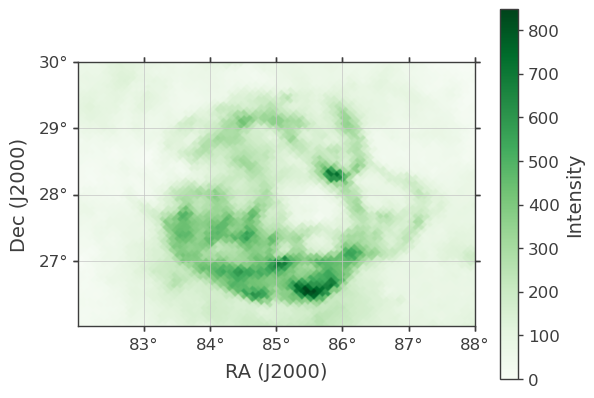

In [4]:
map2, skymapHeader = hp.read_map("/data/home/cwy/Science/3MLWCDA/Standard/res/S147/Halpha_fwhm06_1024.fits",h=True)
map2 = my.change_coord(map2, ["G","C"])
my.heal2fits(map2, "/data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits", ra_min = 82, ra_max = 88, xsize=0.01, dec_min=26, dec_max=30, ysize=0.01, nside=1024, ifplot=0, check=0, alpha=1, ifnorm=True)
figfits, wcs, fitsdata = my.drawfits(fits_file_path="/data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits")

In [ ]:
%matplotlib inline
bestmodel, result = my.Search(ra1, dec1, data_radius, model_radius,  region_name+"_new_freeDGE0-5", WCDA, roi, 0, 5,freeDGE=1, fromcatalog=1, fixcatall=1)

In [3]:
Modelname="cat+1ext+1pt_freeDGE_0-6"
if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
    os.system(f'mkdir ../res/{region_name}/{Modelname}/')

lm = my.getcatModel(ra1, dec1, data_radius, model_radius, roi=roi)
with open(f'../res/{region_name}/{Modelname}/Model_init.txt', 'w') as f:
    for key, value in lm.parameters.items():
        f.write(f'{key}: {value}\n')

# S147 = my.set_diffusemodel("S147", '/data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits', K=7.3776826e-14, Kb=(1e-17, 1e-10))
S147 = my.setsorce("S147",84.5,28.5, sigma=0.2, sb=(0,5), #sf=True, #raf=True,decf=True,
                indexb=(-4,-1),kb=(1e-16, 1e-12), #indexf=True,
                fitrange=1)

PWN = my.setsorce("PWN",84.5,28.5, #sf=True, #raf=True,decf=True,
                indexb=(-4,-1),kb=(1e-16, 1e-12), #indexf=True,
                fitrange=1)

Diffuse = my.set_diffusebkg(
                ra1, dec1, data_radius, data_radius, name=region_name+"WCDA",
                Kf=False, indexf=False
                )
# lm = Model(S147, PWN, Diffuse)
lm.add_source(S147)
lm.add_source(PWN); lm.add_source(Diffuse)

lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)

lm.display(complete=True)
        

00:09:45 INFO      J0534P2200u in model_radius: 8.0 sf:True pf:True kf:True indexf:True                ]8;id=879559;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=902322;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#514\514]8;;\

         INFO      Spec:                                                                               ]8;id=970290;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=631615;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#579\579]8;;\
                   K=2.11e-12 kb=(1.41e-14, 1.00e-11) index=-2.69 indexb=(-4.00,-1.00)                             

         INFO      Mor: fitrange=0.03                                                                  ]8;id=931972;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=97026;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#589\589]8;;\

         WARNING   We have set the min_value of J0534P2200u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=772983;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=375994;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  because there was a postive transform                                                            

         INFO      J0542P2311u in model_radius: 8.0 sf:True pf:True kf:True indexf:True                ]8;id=299101;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=941237;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#514\514]8;;\

         INFO      Spec:                                                                               ]8;id=912487;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=890497;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#579\579]8;;\
                   K=2.08e-13 kb=(1.39e-15, 3.12e-12) index=-1.95 indexb=(-3.95,-1.00)                             

         INFO      Mor:                                                                                ]8;id=562680;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=967100;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#581\581]8;;\
                   sigma=1.45 sb=(0.01,2.89) fitrange=4.00                                                         

         WARNING   We have set the min_value of J0542P2311u.spectrum.main.Powerlaw.K to 1e-99      ]8;id=770959;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=582629;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  because there was a postive transform                                                            

         WARNING   We have set the min_value of S147.spectrum.main.Powerlaw.K to 1e-99 because     ]8;id=269670;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=28903;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  there was a postive transform                                                                    

         WARNING   We have set the min_value of PWN.spectrum.main.Powerlaw.K to 1e-99 because      ]8;id=666863;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=431552;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  there was a postive transform                                                                    

         INFO      Set diffuse range: [173.8761882515279, 187.8761882515279] [-11.120416922412595,    ]8;id=600090;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=121682;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2298\2298]8;;\
                  11.120416922412595]                                                                              

         INFO      ra dec coner:                                                                      ]8;id=86842;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=784552;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2299\2299]8;;\

         INFO      (72.09565075083303, 27.534654967370326)                                            ]8;id=247270;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=240035;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2300\2300]8;;\

         INFO      (80.74857707241122, 16.372828783120497)                                            ]8;id=525827;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=876909;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2301\2301]8;;\

         INFO      (101.71036418428284, 27.24389435719929)                                            ]8;id=187833;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=334580;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2302\2302]8;;\

         INFO      (94.62577936465718, 39.65607009306031)                                             ]8;id=422505;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=125289;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2303\2303]8;;\

         INFO      total sr: 0.09450243804428704                                                      ]8;id=159143;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=250885;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2342\2342]8;;\
                  ratio: 0.03441567082968896                                                                       

         INFO      integration: 4.7194722588394124e-06                                                ]8;id=839941;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=103136;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2343\2343]8;;\
                  ratio: 0.037243985060463405                                                                      

         INFO      set K to: 6.677691882821321e-13                                                    ]8;id=972388;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=461883;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2344\2344]8;;\

         INFO      diffuse file path: ../../data/Diffusedata/S147WCDA_dust_bkg_template.fits          ]8;id=932990;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=58589;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#2371\2371]8;;\

         WARNING   We have set the min_value of Diffuse.spectrum.main.Powerlaw.K to 1e-99 because  ]8;id=741999;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=207670;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#694\694]8;;\
                  there was a postive transform                                                                    

Model summary:
==============

                  N
Point sources     2
Extended sources  3
Particle sources  0

Free parameters (11):
--------------------

                                      value min_value max_value  \
S147.Gaussian_on_sphere.lon0           84.5      83.5      85.5   
S147.Gaussian_on_sphere.lat0           28.5      27.5      29.5   
S147.Gaussian_on_sphere.sigma           0.2       0.0       5.0   
S147.spectrum.main.Powerlaw.K           0.0       0.0       0.0   
S147.spectrum.main.Powerlaw.index      -2.6      -4.0      -1.0   
PWN.position.ra                        84.5      83.5      85.5   
PWN.position.dec                       28.5      27.5      29.5   
PWN.spectrum.main.Powerlaw.K            0.0       0.0       0.0   
PWN.spectrum.main.Powerlaw.index       -2.6      -4.0      -1.0   
Diffuse.spectrum.main.Powerlaw.K        0.0       0.0       0.0   
Diffuse.spectrum.main.Powerlaw.index -2.733      -4.0      -1.0   

                                                unit  
S147.Gaussian_on_sphere.lon0                     deg  
S147.Gaussian_on_sphere.lat0                     deg  
S147.Gaussian_on_sphere.sigma                    deg  
S147.spectrum.main.Powerlaw.K         keV-1 s-1 cm-2  
S147.spectrum.main.Powerlaw.index                     
PWN.position.ra                                  deg  
PWN.position.dec                                 deg  
PWN.spectrum.main.Powerlaw.K          keV-1 s-1 cm-2  
PWN.spectrum.main.Powerlaw.index                      
Diffuse.spectrum.main.Powerlaw.K      keV-1 s-1 cm-2  
Diffuse.spectrum.main.Powerlaw.index                  

Fixed parameters (17):
---------------------

                                                                                      value  \
J0534P2200u.position.ra                                                               83.62   
J0534P2200u.position.dec                                                              22.01   
J0534P2200u.spectrum.main.Powerlaw.K                                                    0.0   
J0534P2200u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J0534P2200u.spectrum.main.Powerlaw.index                                              -2.69   
J0542P2311u.Gaussian_on_sphere.lon0                                                   86.07   
J0542P2311u.Gaussian_on_sphere.lat0                                                   23.19   
J0542P2311u.Gaussian_on_sphere.sigma                                                   1.45   
J0542P2311u.spectrum.main.Powerlaw.K                                                    0.0   
J0542P2311u.spectrum.main.Powerlaw.piv                                         3000000000.0   
J0542P2311u.spectrum.main.Powerlaw.index                                              -1.95   
S147.spectrum.main.Powerlaw.piv                                                3000000000.0   
PWN.spectrum.main.Powerlaw.piv                                                 3000000000.0   
Diffuse.SpatialTemplate_2D.K                                                            1.0   
Diffuse.SpatialTemplate_2D.hash           1389017525880140579864566943032514317764923839...   
Diffuse.SpatialTemplate_2D.ihdu                                                         0.0   
Diffuse.spectrum.main.Powerlaw.piv                                             3000000000.0   

                                         min_value max_value            unit  
J0534P2200u.position.ra                     83.588    83.652             deg  
J0534P2200u.position.dec                    21.978    22.042             deg  
J0534P2200u.spectrum.main.Powerlaw.K           0.0       0.0  keV-1 s-1 cm-2  
J0534P2200u.spectrum.main.Powerlaw.piv        None      None             keV  
J0534P2200u.spectrum.main.Powerlaw.index      -4.0      -1.0                  
J0542P2311u.Gaussian_on_sphere.lon0          82.07     90.07             deg  
J0542P2311u.Gaussian_on_sphere.lat0          19.19     27.19        

00:10:06 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=379062;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=944351;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.355                      ]8;id=866163;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=862948;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=167929;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=182593;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.333                      ]8;id=600268;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=926006;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=907587;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=547583;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 25.953                      ]8;id=68828;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=346102;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt

setting the output map dtype to [dtype('float64')]


(80.37597656249999, 21.141783846091244)


<Figure size 640x480 with 0 Axes>

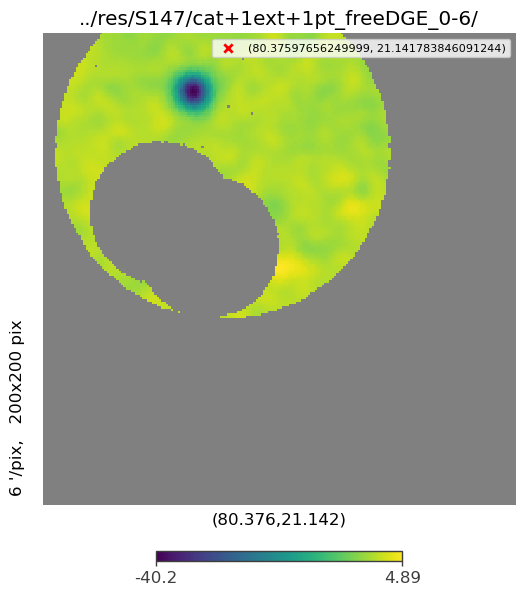

(masked_array(data=[--, --, --, ..., --, --, --],
              mask=[ True,  True,  True, ...,  True,  True,  True],
        fill_value=-1.6375e+30),
 (80.37597656249999, 21.141783846091244))

<Figure size 640x480 with 0 Axes>

In [4]:
my.getresaccuracy(WCDA, lm, plot=True, savepath=f"../res/{region_name}/{Modelname}/")

In [75]:
reload(my)

Load sub from Mystat: : 40it [01:00,  1.52s/it] 
Load sub from Mystat: : 40it [00:00, 209.99it/s]                            

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

In [76]:
my.get_residual_significance_mapfast(WCDA, lm=None, combine='weighted', plot=True, savepath=f"../res/{region_name}/{Modelname}/")

Using user-provided alpha: 3.24e-05
0.045488711985587856


Load sub from Mystat: : 40it [00:13, 209.99it/s]setting the output map dtype to [dtype('float64')]


Plotting results for 12582912 bins.


TypeError: input map is a scalar

ValueError: Image size of 1774000x1418800 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1.774e+06x1.4188e+06 with 1 Axes>

22:59:56 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=974361;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=195035;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.355                      ]8;id=426869;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=503613;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=643753;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=762504;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.333                      ]8;id=490764;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=5691;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=645243;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=490693;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 25.953                      ]8;id=857445;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=209270;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

22:59:57 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=653918;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=784621;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 23.355                      ]8;id=93605;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=255554;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=391773;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=753150;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 26.333                      ]8;id=446530;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=37453;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      Considering 19 dec bins for extended source Diffuse             ]8;id=739216;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=294475;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#220\220]8;;\

         INFO      Central bin is bin at Declination = 25.953                      ]8;id=5969;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=276061;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/hawc_hal/convolved_source/convolved_extended_source.py#229\229]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=349143;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=937469;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1059\1059]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=49507;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=394666;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1076\1076]8;;\

23:10:24 ERROR     Current minimum stored after fit (14040.263881086306) and current        ]8;id=15124;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=954024;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#369\369]8;;\
                  (14040.263858595055) do not correspond!                                                          

         WARNING   23.02 percent of samples have been thrown away because they failed the  ]8;id=204685;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=731840;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/threeML/analysis_results.py#1739\1739]8;;\
                  constraints on the parameters. This results might not be suitable for                            
                  error propagation. Enlarge the boundaries until you loose less than 1                            
                  percent of the samples.                                                                          

23:10:24 WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-20.     ]8;id=327843;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=117013;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 82.07.  ]8;id=691901;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=960345;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 19.19.  ]8;id=379649;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=105782;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=882449;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=277463;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  2.8899999999999997.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=43208;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=789123;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.1200000000000007e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 83.5.   ]8;id=455395;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=726239;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 27.5.   ]8;id=459497;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=945368;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 5.0.  ]8;id=263173;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=962033;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=638263;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=621405;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=922439;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=234442;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=76477;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=699953;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  6.677691882821322e-19.                                                                           

Best fit values:

,result,unit
parameter,,
S147.Gaussian_on_sphere.lon0,(8.507 +/- 0.012) x 10,deg
S147.Gaussian_on_sphere.lat0,(2.807 +/- 0.010) x 10,deg
S147.Gaussian_on_sphere.sigma,(7.7 +/- 0.7) x 10^-1,deg
S147.spectrum.main.Powerlaw.K,(9.4 -1.3 +1.5) x 10^-23,1 / (cm2 keV s)
S147.spectrum.main.Powerlaw.index,-2.69 +/- 0.06,
PWN.position.ra,(8.4593 +/- 0.0031) x 10,deg
PWN.position.dec,(2.8468 +/- 0.0030) x 10,deg
PWN.spectrum.main.Powerlaw.K,(0.8 -0.7 +5) x 10^-23,1 / (cm2 keV s)
PWN.spectrum.main.Powerlaw.index,-1.8 +/- 1.0,


Correlation matrix:

1.00,-0.32,0.28,-0.43,0.08,-0.34,-0.08,0.56,-0.56,-0.03,-0.01
-0.32,1.00,-0.32,0.39,-0.06,0.29,0.04,-0.54,0.54,0.01,0.01
0.28,-0.32,1.00,-0.15,0.08,-0.08,-0.09,0.56,-0.56,-0.08,-0.00
-0.43,0.39,-0.15,1.00,-0.08,0.79,0.11,-0.68,0.68,-0.13,0.03
0.08,-0.06,0.08,-0.08,1.00,-0.06,0.00,0.12,-0.13,0.01,-0.08
-0.34,0.29,-0.08,0.79,-0.06,1.00,0.08,-0.50,0.50,-0.11,0.02
-0.08,0.04,-0.09,0.11,0.00,0.08,1.00,-0.12,0.11,-0.00,0.00
0.56,-0.54,0.56,-0.68,0.12,-0.50,-0.12,1.00,-1.00,-0.05,-0.01
-0.56,0.54,-0.56,0.68,-0.13,0.50,0.11,-1.00,1.00,0.05,0.01
-0.03,0.01,-0.08,-0.13,0.01,-0.11,-0.00,-0.05,0.05,1.00,0.02
-0.01,0.01,-0.00,0.03,-0.08,0.02,0.00,-0.01,0.01,0.02,1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,14040.263859
total,14040.263859


Values of statistical measures:

,statistical measures
AIC,28102.528827
BIC,28216.700559


         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-20.     ]8;id=445665;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=101921;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 82.07.  ]8;id=401864;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=242330;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 19.19.  ]8;id=831362;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=722406;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=335831;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=127916;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  2.8899999999999997.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=172533;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=347447;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.1200000000000007e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 83.5.   ]8;id=570457;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=895170;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 27.5.   ]8;id=130925;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=31484;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 5.0.  ]8;id=753497;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=270185;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=595359;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=894471;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=477270;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=707126;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=551310;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=725944;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  6.677691882821322e-19.                                                                           

Smoothing planes:   0%|          | 0/7 [00:00<?, ?it/s]

23:10:30 WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-20.     ]8;id=720428;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=929071;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 82.07.  ]8;id=252264;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=294832;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 19.19.  ]8;id=158001;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=299256;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=229747;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=671333;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  2.8899999999999997.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=627591;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=672409;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.1200000000000007e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 83.5.   ]8;id=231520;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=770506;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 27.5.   ]8;id=57283;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=812251;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 5.0.  ]8;id=189899;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=364700;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=150760;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=380408;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=595685;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=853934;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=537918;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=798249;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  6.677691882821322e-19.                                                                           

         WARNING   The current value of the parameter K (1.0) was above the new maximum 1e-20.     ]8;id=649134;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=772313;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 82.07.  ]8;id=585490;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=751166;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 19.19.  ]8;id=551971;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=372364;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum       ]8;id=809528;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=98954;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  2.8899999999999997.                                                                              

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=116632;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=324913;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  3.1200000000000007e-21.                                                                          

         WARNING   The current value of the parameter lon0 (0.0) was below the new minimum 83.5.   ]8;id=268025;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=434632;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter lat0 (0.0) was below the new minimum 27.5.   ]8;id=856263;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=154636;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#707\707]8;;\

         WARNING   The current value of the parameter sigma (10.0) was above the new maximum 5.0.  ]8;id=694049;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=575943;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=18396;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=236855;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=839241;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=253663;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  1.0000000000000001e-21.                                                                          

         WARNING   The current value of the parameter K (1.0) was above the new maximum            ]8;id=967684;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=227980;file:///data/home/cwy/.mylib/miniconda3/envs/3MLhal/lib/python3.9/site-packages/astromodels/core/parameter.py#777\777]8;;\
                  6.677691882821322e-19.                                                                           

,value,negative_error,positive_error,error,unit
S147.Gaussian_on_sphere.lon0,8.506519e+01,-9.175027e-02,1.365452e-01,1.141477e-01,deg
S147.Gaussian_on_sphere.lat0,2.806946e+01,-1.144779e-01,7.308780e-02,9.378285e-02,deg
S147.Gaussian_on_sphere.sigma,7.661055e-01,-5.242911e-02,7.864126e-02,6.553519e-02,deg
S147.spectrum.main.Powerlaw.K,9.436190e-23,-1.442101e-23,9.057263e-24,1.173914e-23,1 / (cm2 keV s)
S147.spectrum.main.Powerlaw.index,-2.688337e+00,-5.685083e-02,6.020257e-02,5.852670e-02,
PWN.position.ra,8.459304e+01,-3.506028e-02,2.309662e-02,2.907845e-02,deg
PWN.position.dec,2.846803e+01,-3.147312e-02,2.882665e-02,3.014989e-02,deg
PWN.spectrum.main.Powerlaw.K,7.615610e-24,-4.411781e-24,7.018017e-23,3.729598e-23,1 / (cm2 keV s)
PWN.spectrum.main.Powerlaw.index,-1.791974e+00,-1.108046e+00,4.214355e-01,7.647408e-01,
Diffuse.spectrum.main.Powerlaw.K,3.967438e-22,-4.773134e-23,5.150750e-23,4.961942e-23,1 / (cm2 keV s)


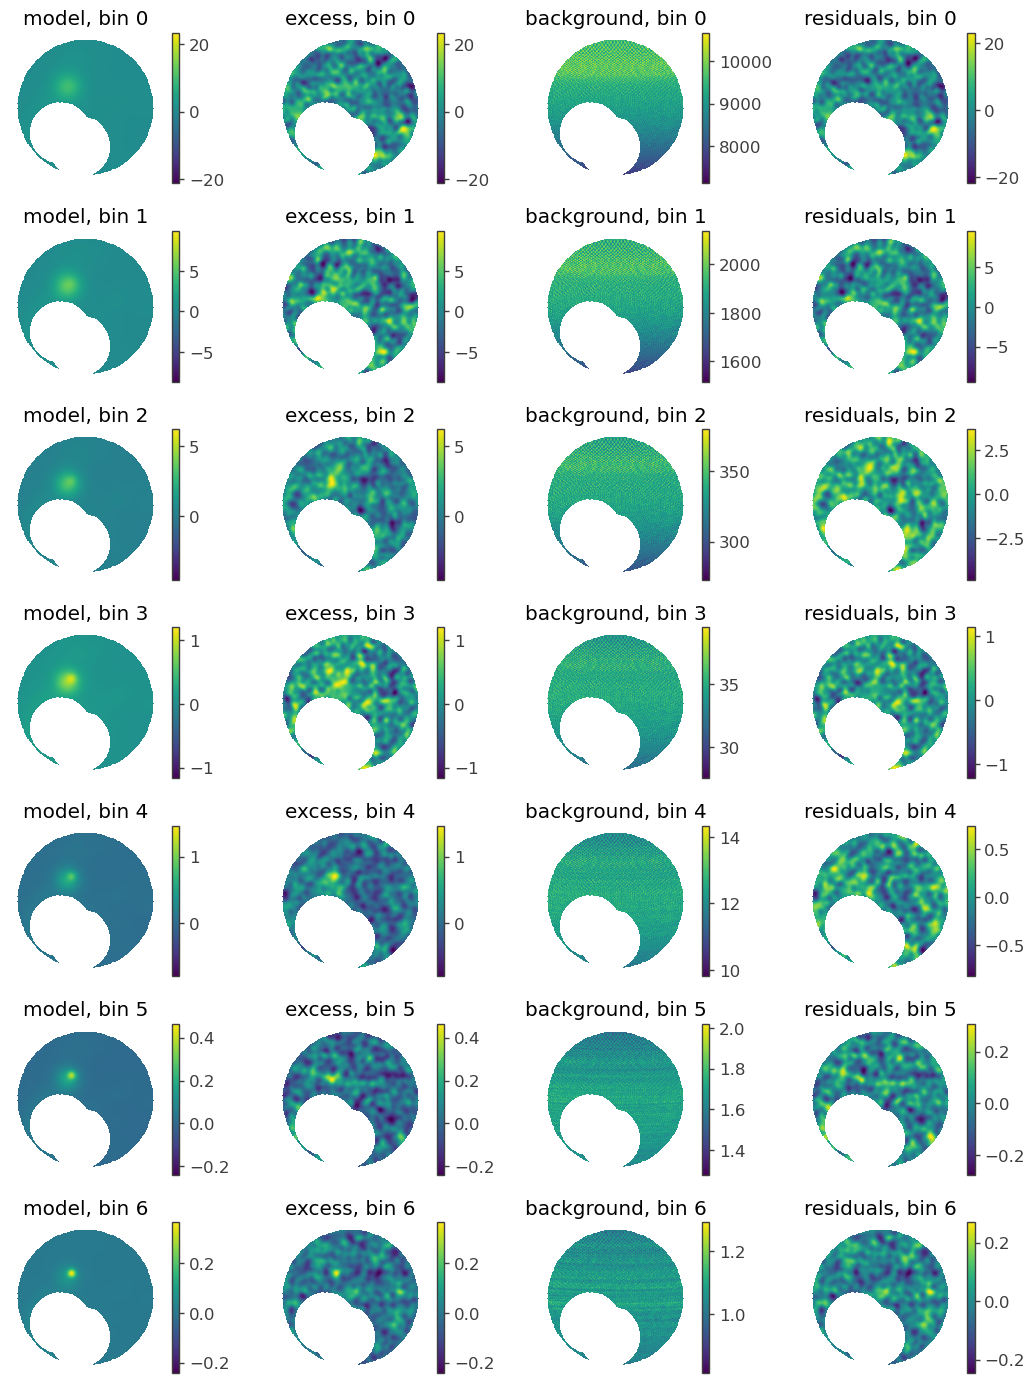

In [12]:
%matplotlib inline
result = my.fit(region_name, Modelname, WCDA, lm, 0, 6,mini="ROOT")
sources = my.get_sources(lm,result)
result[1][0]
# result[0].get_contours(J0248.Gaussian_on_sphere.lon0,39.88,44.88,30)

In [21]:
TSlist = ["S147", "PWN", "Diffuse"] #
TS, TSresults = my.getTSall(TSlist, region_name, Modelname, result, WCDA)
TSresults

19:00:01 INFO      TS_all: 279651.36170804454                                                         ]8;id=441261;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=798267;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1047\1047]8;;\

         INFO      llh_all: -23494.31298519041                                                        ]8;id=671158;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=396598;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1049\1049]8;;\

19:00:02 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=804383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=325938;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=136783;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=638767;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse             ]8;id=518619;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=624335;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 26.204                      ]8;id=333074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=75258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=175699;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=588785;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=348401;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=911898;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

19:03:31 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=690418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=212856;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=981049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=12439;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=458202;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=820398;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.940                      ]8;id=630811;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=967479;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse             ]8;id=906729;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=788606;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 26.204                      ]8;id=280712;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=501275;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

19:03:31 INFO      TS_S147: 52.78058198461076                                                         ]8;id=118868;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=795710;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1052\1052]8;;\

19:03:32 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=626501;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=574420;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=956499;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=832538;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=706799;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=545722;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.940                      ]8;id=963273;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=738074;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse             ]8;id=996721;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=506457;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 26.204                      ]8;id=893868;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=238967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=577234;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=475062;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=426776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=187790;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

19:05:34 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=181167;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=225844;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=870075;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=498838;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=212477;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=268571;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.940                      ]8;id=610432;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=432126;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse             ]8;id=587258;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=336827;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 26.204                      ]8;id=937690;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=95488;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

19:05:34 INFO      TS_PWN: 25.235099298370187                                                         ]8;id=497628;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=150025;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1052\1052]8;;\

19:05:35 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=601756;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=669196;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=780664;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=263904;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=231897;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=922313;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.940                      ]8;id=824922;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=302541;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      set the minimizer to minuit                                             ]8;id=962355;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=427444;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

         INFO      set the minimizer to ROOT                                               ]8;id=715967;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py\joint_likelihood.py]8;;\:]8;id=729445;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/classicMLE/joint_likelihood.py#1071\1071]8;;\

19:08:54 INFO      Considering 14 dec bins for extended source J0542P2311u         ]8;id=540042;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=740832;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 23.521                      ]8;id=944381;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=664059;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 19 dec bins for extended source S147                ]8;id=293203;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=657689;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 25.940                      ]8;id=965128;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=220750;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

         INFO      Considering 18 dec bins for extended source Diffuse             ]8;id=499946;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=303425;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#133\133]8;;\

         INFO      Central bin is bin at Declination = 26.204                      ]8;id=375980;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=211280;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#142\142]8;;\

19:08:54 INFO      TS_Diffuse: 6.720513772408594                                                      ]8;id=984773;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py\Myfit.py]8;;\:]8;id=785688;file:///data/home/cwy/Science/3MLWCDA/Standard/src/./mylib/Myfit.py#1052\1052]8;;\


100%|██████████| 3/3 [08:53<00:00, 177.69s/it]


,S147,PWN,Diffuse,TS_all,-log(likelihood)
0,52.780582,25.235099,6.720514,279651.361708,23494.312985


In [24]:
reload(my)

Load sub from Mystat: : 40it [01:36,  2.42s/it] 
ReLoad Mycatalog:  61%|██████    | 23/38 [00:00<00:00, 195.67it/s]  
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Mystat: : 40it [00:00, 195.67it/s]                            

Yourlib init successfully!!!


<module 'mylib' from '/data/home/cwy/Science/3MLWCDA/Standard/src/mylib/__init__.py'>

PSR:  1 79.29166666666666 22.266666666666666 J0517+22
PSR:  2 82.21774999999998 22.00111111111111 J0528+2200
PSR:  3 83.63320833333333 22.01447222222222 J0534+2200
PSR:  4 84.60441666666665 28.28588888888889 J0538+2817
PSR:  5 85.15466666666666 32.127027777777776 J0540+3207
PSR:  6 85.79025 23.484722222222224 J0543+2329
PSR:  7 86.61983333333332 24.689166666666665 J0546+2441
PSR:  8 88.52087499999999 31.128055555555555 J0554+3107
SNR:  1 81.27083333333333 28.183333333333334 G178.2-04.2 0
SNR:  2 83.62916666666665 22.016666666666666 G184.6-05.8 0
SNR:  3 84.75 27.833333333333332 G180.0-01.7 0
SNR:  4 88.41666666666664 31.083333333333332 G179.0+02.6 0
3FHL:  1 75.25725 24.423498 3FHL J0501.0+2425
3FHL:  2 75.41394 30.795534 3FHL J0501.6+3047
3FHL:  3 80.44172 21.213364 3FHL J0521.7+2112
3FHL:  4 81.13713 28.639719 3FHL J0524.5+2838
3FHL:  5 83.634834 22.019203 3FHL J0534.5+2201
3FHL:  6 84.41 27.86 3FHL J0537.6+2751e
3FHL:  7 87.29354 32.967197 3FHL J0549.1+3258
3FHL:  8 89.91721 30.7621

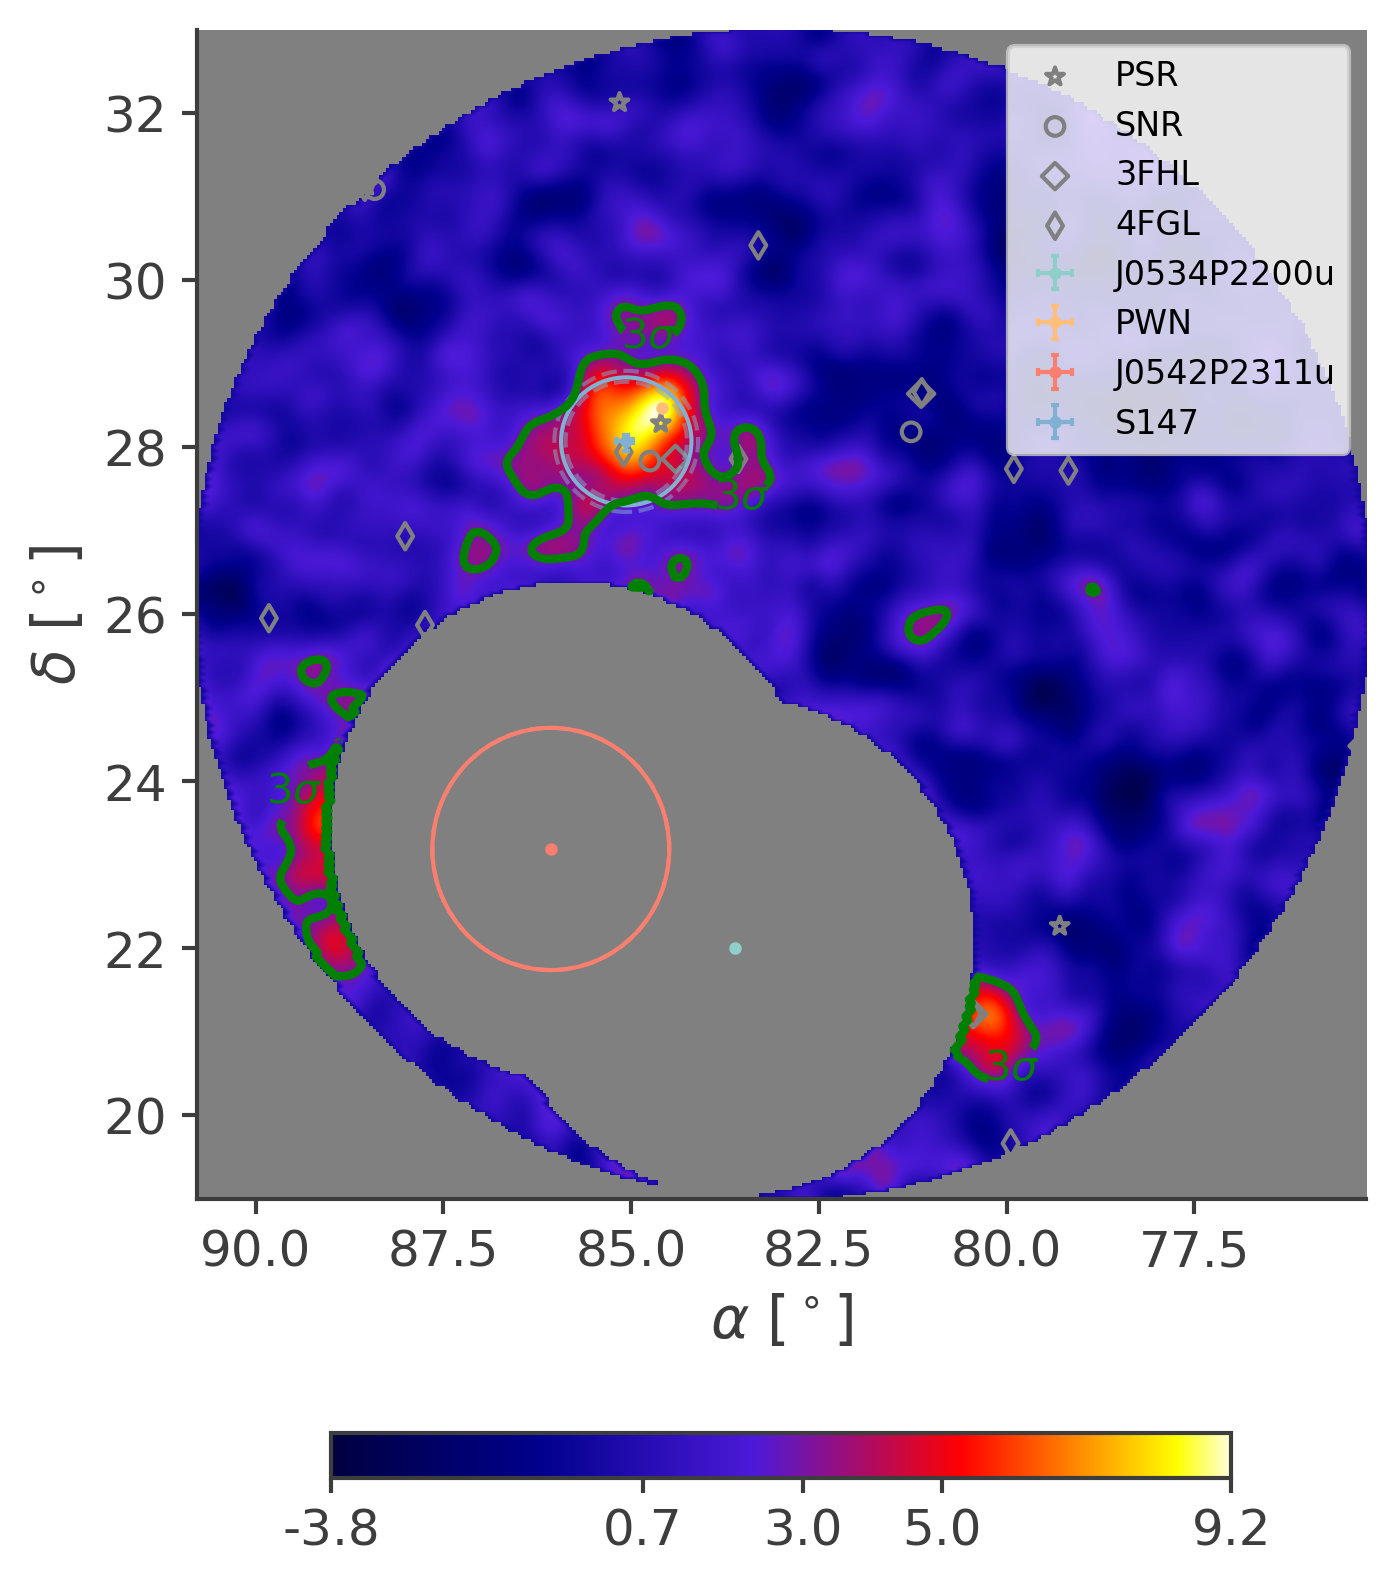

In [14]:
%matplotlib inline
sources = my.get_sources(lm,result) #
sources.pop("Diffuse")
# sources.pop("S147")
# sources={}

map2, skymapHeader = hp.read_map("../../data/fullsky_WCDA_20240731_0-6_2.6.fits.gz",h=True)
map2 = my.maskroi(map2, roi)

fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[3],save=1, 
                cat={"PSR": [0, "*"],"SNR": [0, "o"],"3FHL": [0, "D"],"4FGL": [0, "d"],"size": 20,"markercolor": "grey","labelcolor": "black","angle": 60,"catext": 1  }, #
                # cat={ "LHAASO": [0, "P"],"TeVCat": [0, "s"],"PSR": [0, "*"],"SNR": [0, "o"],"3FHL": [0, "D"], "4FGL": [0, "d"], "YMC": [0, "^"], "GYMC":[0, "v"], "WR":[0, "X"], "size": 20, "color": "grey", "angle": 60, "catext": 1}, #2*data_radius
                # color="Milagro"
                  color="Fermi",
                  # Drawdiff=1, legend=0,
                  # ifdrawfits=1, cutl=0, alphaf=1, fitsfile="/data/home/cwy/Science/3MLWCDA/Standard/res/S147/S147_HI_temp.fits" #, vmin=-15, vmax=30, #
                  )
# ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')

In [460]:
my.write_resmap(region_name, Modelname, WCDA, roi, maptree, ra1, dec1, "S147_res_all",[0],[0,0])

processing at nHit0 0


100%|██████████| 95566/95566 [00:02<00:00, 40242.38it/s]


processing at nHit0 1


100%|██████████| 95566/95566 [00:01<00:00, 47969.69it/s]


processing at nHit0 2


100%|██████████| 95566/95566 [00:02<00:00, 47681.52it/s]


processing at nHit0 3


100%|██████████| 95566/95566 [00:02<00:00, 47487.22it/s]


processing at nHit0 4


100%|██████████| 95566/95566 [00:02<00:00, 37171.38it/s]


processing at nHit0 5


100%|██████████| 95566/95566 [00:02<00:00, 46502.56it/s]


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(5 +/- 4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3289.100294
total,3289.100294


Values of statistical measures:

,statistical measures
AIC,6580.200600
BIC,6590.902058


0 0 1.738107681274414 4
get upper limit


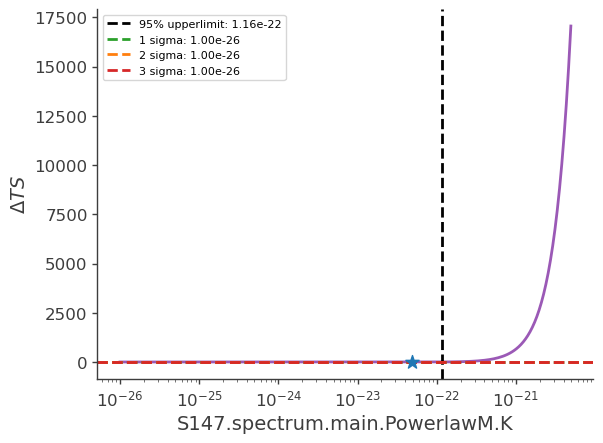

Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(9.7 +/- 3.2) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3183.27443
total,3183.27443


Values of statistical measures:

,statistical measures
AIC,6368.548873
BIC,6379.250331


1 0 9.289955615997314 4


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(1.45 +/- 0.24) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3602.160705
total,3602.160705


Values of statistical measures:

,statistical measures
AIC,7206.321423
BIC,7217.022881


2 0 35.48036950826645 4


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(1.00 +/- 0.32) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3640.305695
total,3640.305695


Values of statistical measures:

,statistical measures
AIC,7282.611401
BIC,7293.312859


3 0 9.660153966397047 4


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(1.67 +/- 0.29) x 10^-22,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3513.395352
total,3513.395352


Values of statistical measures:

,statistical measures
AIC,7028.790716
BIC,7039.492174


4 0 34.01602204167284 4


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(9 +/- 4) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3107.293096
total,3107.293096


Values of statistical measures:

,statistical measures
AIC,6216.586204
BIC,6227.287662


5 0 6.511621873389231 4


Best fit values:

,result,unit
parameter,,
S147.spectrum.main.PowerlawM.K,(-7 +/- 6) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3150.498685
total,3150.498685


Values of statistical measures:

,statistical measures
AIC,6302.997382
BIC,6313.698840


6 0 0 4
get upper limit


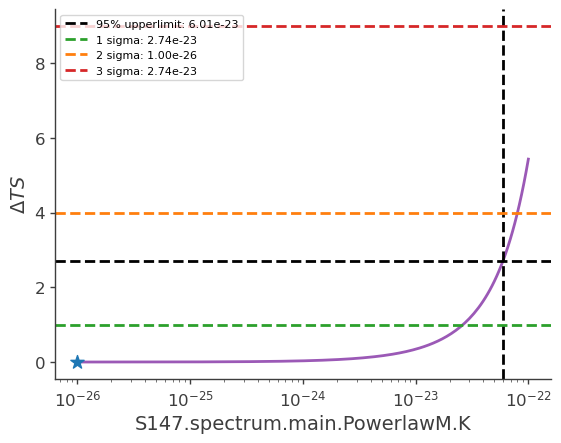

100%|██████████| 7/7 [00:38<00:00,  5.50s/it]


Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(-8 +/- 6) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3289.425431
total,3289.425431


Values of statistical measures:

,statistical measures
AIC,6580.850875
BIC,6591.552332


0 0 0 4
get upper limit


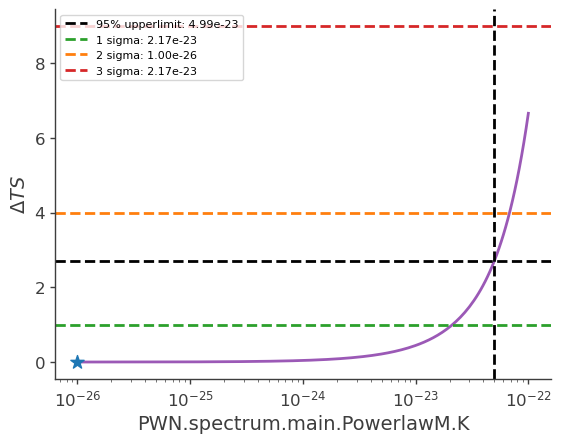

Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(-1.5 +/- 2.8) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3183.02585
total,3183.02585


Values of statistical measures:

,statistical measures
AIC,6368.051711
BIC,6378.753169


1 0 0 4
get upper limit


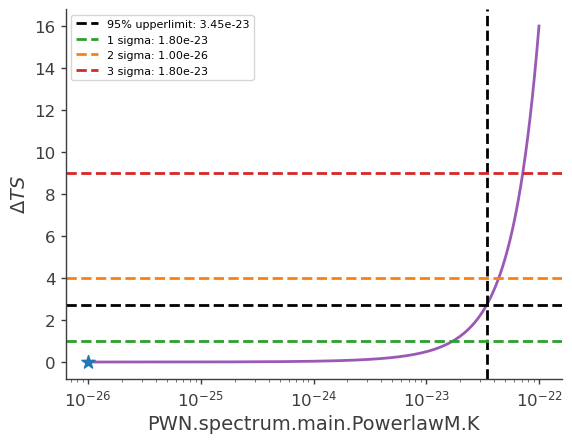

Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(0.8 +/- 1.1) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3603.123605
total,3603.123605


Values of statistical measures:

,statistical measures
AIC,7208.247222
BIC,7218.948680


2 0 0.636923611164093 4
get upper limit


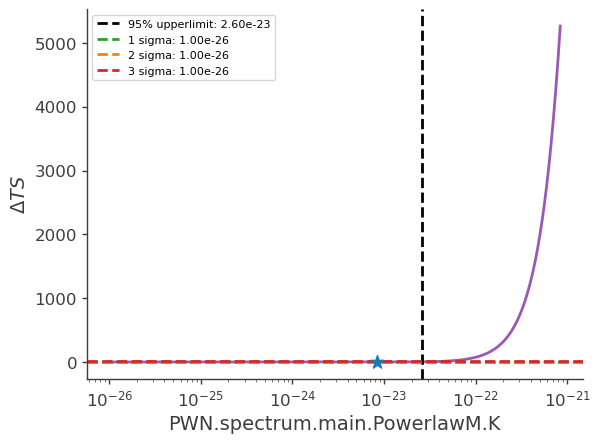

Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(-1 +/- 8) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3639.593273
total,3639.593273


Values of statistical measures:

,statistical measures
AIC,7281.186558
BIC,7291.888016


3 0 0 4
get upper limit


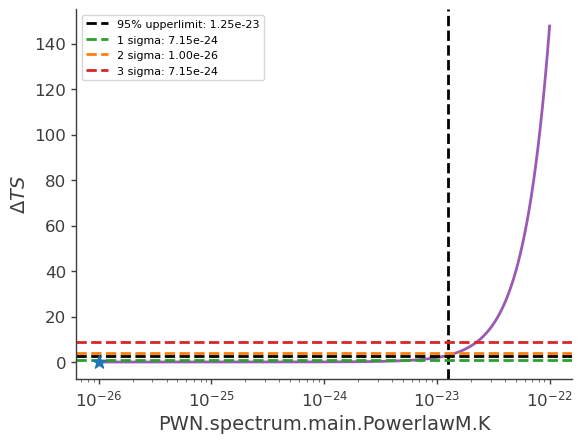

Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(1.7 +/- 0.5) x 10^-23,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3513.321097
total,3513.321097


Values of statistical measures:

,statistical measures
AIC,7028.642205
BIC,7039.343663


4 0 15.798213301226497 4


Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(6.2 +/- 3.0) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3107.092111
total,3107.092111


Values of statistical measures:

,statistical measures
AIC,6216.184234
BIC,6226.885692


5 0 4.871067014930304 4


Best fit values:

,result,unit
parameter,,
PWN.spectrum.main.PowerlawM.K,(8.8 +/- 2.2) x 10^-24,1 / (cm2 keV s)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA_1,3154.214859
total,3154.214859


Values of statistical measures:

,statistical measures
AIC,6310.429731
BIC,6321.131188


100%|██████████| 7/7 [00:42<00:00,  6.12s/it]

6 0 20.817192347356468 4


In [23]:
Flux_WCDA0, jls0  = my.getdatapoint(WCDA, lm, maptree, response, roi, "S147", ifpowerlawM=1)
Flux_WCDA1, jls1  = my.getdatapoint(WCDA, lm, maptree, response, roi, "PWN", ifpowerlawM=1)

processing MLE analyses:   0%|          | 0/2 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]

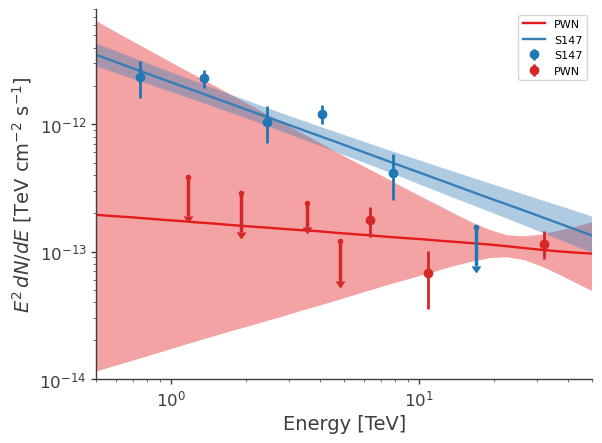

In [24]:
%matplotlib inline
import matplotlib as mpl

x_Max=50.
x_Min=0.5
y_Min=0.1e-13
y_Max=8e-12
fig,ax = plt.subplots()
plot_spectra(
    result[0].results,
    sources_to_use=["S147","PWN"], # 
    include_extended=True,
    ene_min=x_Min,
    ene_max=x_Max,
    num_ene=30,
    energy_unit="TeV",
    flux_unit="TeV/(s cm2)",
    subplot=ax,
    )

my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"S147","tab:blue")
my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA1,"PWN","tab:red")

# LHAASO_sensitivity = np.genfromtxt("./LHAASO_sensitivity.csv",delimiter=',')
# plt.plot(LHAASO_sensitivity[:,0],LHAASO_sensitivity[:,1]*1e-11,label="LHAASO 1yr", c="black")

ax.set_xlim(x_Min,x_Max)
ax.set_ylim(y_Min,y_Max)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
ax.set_xlabel("Energy [TeV]")
plt.legend()
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')